In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Histogram Manipulation By Backprojection

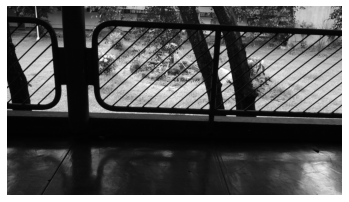

In [2]:
#read image file
data = Image.open('image2.jpg').convert('L')
data = np.array(data)

plt.axis('off')
plt.imshow(data,cmap='gray')
plt.savefig('data_gray.png',bbox_inches='tight',dpi=300)
plt.show()

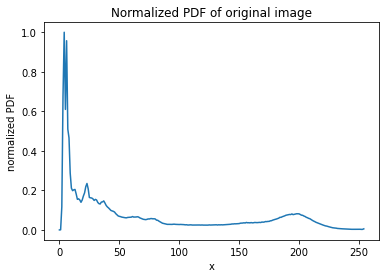

In [3]:
#calculate for the PDF and CDF
PDF = np.histogram(data,bins=range(256))
normPDF = PDF[0]/max(PDF[0])
CDF = np.cumsum(normPDF)
normCDF = CDF/max(CDF)

plt.plot(normPDF)
plt.title('Normalized PDF of original image')
plt.xlabel('x')
plt.ylabel('normalized PDF')
plt.savefig('normal_PDF.png',bbox_inches='tight',dpi=300)
plt.show()

(1152, 2048)


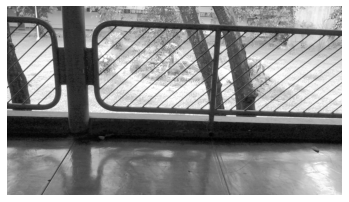

In [4]:
#apply backprojection
desiredCDF = normCDF
newImg = np.interp(data,PDF[1][:255],desiredCDF)
print(newImg.shape)

plt.axis('off')
plt.imshow(newImg,cmap='gray')
plt.savefig('data_bakcprojected.png',bbox_inches='tight',dpi=300)
plt.show()

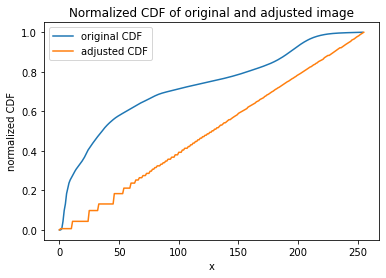

In [5]:
#calculate for the new PDF and CDF
newPDF = np.histogram(newImg,bins=256,range=(0,1))
newNormPDF = newPDF[0]/max(newPDF[0])
newCDF = np.cumsum(newNormPDF)
newNormCDF = newCDF/max(newCDF)

plt.plot(normCDF,label='original CDF')
plt.plot(newNormCDF,label='adjusted CDF')
plt.title('Normalized CDF of original and adjusted image')
plt.ylabel('normalized CDF')
plt.xlabel('x')
plt.legend()
plt.savefig('CDF.png',bbox_inches='tight',dpi=300)
plt.show()

## Contrast Stretching

The CDF computed for the grayscale image also gives the grayscale at which a number of pixels reaches a certain percentile.

$I_{new} = \dfrac{I_{old}-I_{min}}{I_{max}-I_{min}}$

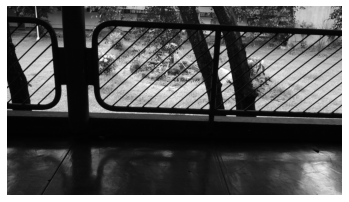

In [6]:
val = [0.2,0.9]
grayscale = np.interp(val,normCDF,PDF[1][:255])
I_new = (data - grayscale[0]) / (grayscale[1] - grayscale[0])

plt.axis('off')
plt.imshow(I_new, cmap='gray')
plt.savefig('CS_pos.png',bbox_inches='tight',dpi=300)
plt.show()

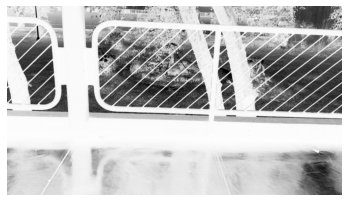

In [7]:
val = [0.9,0.2]
grayscale = np.interp(val,normCDF,PDF[1][:255])
I_new = (data - grayscale[0]) / (grayscale[1] - grayscale[0])

plt.axis('off')
plt.imshow(I_new, cmap='gray')
plt.savefig('CS_neg.png',bbox_inches='tight',dpi=300)
plt.show()

Making $I_{min}$ larger results to a negative image such as the above

## Automatic White Balancing Algorithms

Image Shape: (1930, 1260, 3)
Image Shape: (616, 792, 3)


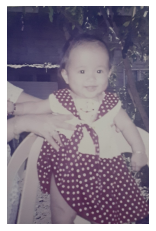

In [13]:
img = Image.open('faded.jpg')
image = np.array(img)
print('Image Shape:', image.shape)

#get RGB channels
R = image[...,0]
G = image[...,1]
B = image[...,2]

#show image
plt.axis('off')
plt.imshow(image)

In [9]:
#obtain PDF and CDF of image
PDF_auto = np.histogram(image,bins=range(256))
normPDF_auto = PDF_auto[0]/max(PDF_auto[0])
CDF_auto = np.cumsum(normPDF_auto)
normCDF_auto = CDF_auto/max(CDF_auto)

### Contrast Stretching

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


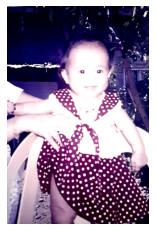

In [10]:
#define contrast stretching on each channel
def contrast(data,val):
    grayscale = np.interp(val,normCDF_auto,PDF_auto[1][:255])
    I_new = (data - grayscale[0]) / (grayscale[1] - grayscale[0])
    return I_new

#collect in one matrix
val = [0.2,0.8]
img_cs = np.zeros((image.shape))
img_cs[...,0] = contrast(R,val)
img_cs[...,1] = contrast(G,val)
img_cs[...,2] = contrast(B,val)

#plot
plt.axis('off')
plt.imshow(img_cs)
plt.savefig('CS_wb.png',bbox_inches='tight',dpi=300)
plt.show()

### Gray World Algorithm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


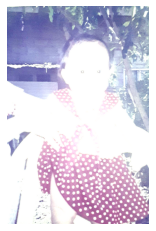

In [11]:
R_ave = np.mean(R)
G_ave = np.mean(G)
B_ave = np.mean(B)

#divide each RGB channel with respective average
img_gw = np.zeros((image.shape))
img_gw[...,0] = R / R_ave
img_gw[...,1] = G / G_ave
img_gw[...,2] = B / B_ave

#plot
plt.axis('off')
plt.imshow(img_gw)
plt.savefig('GW_wb.png',bbox_inches='tight',dpi=300)
plt.show()

### White Patch Algorithm
This technique only works if there are white patch in the image

White Patch Shape: (616, 792, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


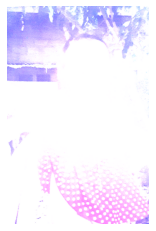

In [14]:
white_img = Image.open('white.jpg')
white = np.array(white_img)
print('White Patch Shape:', white.shape)

R_w = np.mean(white[...,0])
G_w = np.mean(white[...,1])
B_w = np.mean(white[...,2])

#divide each RGB channel with each white patch average
img_wp = np.zeros((image.shape))
img_wp[...,0] = R / R_w
img_wp[...,1] = G / G_w
img_wp[...,2] = B / B_w

#plot
plt.axis('off')
plt.imshow(img_wp)
plt.savefig('WP_wb.png',bbox_inches='tight',dpi=300)
plt.show()